# Práctica 2: 



# Librerías

Importar paquetes

In [5]:
import pandas as pd
import missingno as msno
import numpy as np
%matplotlib inline

# Importación de datos

Definimos la ruta del archivo

In [6]:
file = '../../Data/WhatsApp/Chat_limpio.csv'

Cargamos la tabla en un dataframe 



In [7]:
df = pd.read_csv(file)

In [8]:
df.head()

,fecha,hora,persona,mensaje,lab_minutes
0,2019-03-08,13:14:00,x1,XD,478
1,2019-03-08,13:15:00,x2,Quien es Kike y quien ea Lalo?,479
2,2019-03-08,13:15:00,x2,🤔,479
3,2019-03-08,13:16:00,x3,<Multimedia omitido>,480
4,2019-03-08,13:17:00,x2,Va jeje,481


# Ejercicio

Copiamos el dataframe para trabajar sobre él sin alterar el origen de los datos

In [9]:
df_copy = df.copy()

Revisamos las dimensiones del problema, literalmente

In [10]:
df_copy.shape

(8130, 5)

Revisamos el número de observaciones o filas

In [11]:
df_copy.shape[0]

8130

Revisamos el número de variables o características o atributos

In [12]:
df_copy.shape[1]

5

Revisamos las variables

In [ ]:
df_copy.columns

Enlistamos las columnas

In [13]:
list(df_copy.columns)

['fecha', 'hora', 'persona', 'mensaje', 'lab_minutes']

Seleccionamos una variable y reviamos sus valores

In [14]:
df_copy['persona'].value_counts()

x5     1677
x4     1418
x8     1220
x2      983
x7      740
x6      689
x9      430
x1      381
x11     358
x10     204
x3       30
Name: persona, dtype: int64

Seleccionamos una variable y revisamos los valores únicos

In [15]:
df_copy['persona'].unique()

array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11'],
      dtype=object)

Revisamos todas las columnas y checamos sus valores únicos 

In [16]:
l = []
bandera = np.NAN
for column in df_copy.columns:
    if df_copy[column].dtype == np.int64:
        bandera = 'entero'
    elif df_copy[column].dtype == np.float64:
        bandera = 'flotante'
    else:
        bandera = 'otro'
        
    try:
        df_copy[column] =df_copy[column].astype('int64')
    except:
        l.append(column)
        
    print('COLUMNA: ', column)
    print('TIPO: ', bandera)
    print('NUNIQUE: ', df_copy[column].nunique())
    print('UNIQUE: ', df_copy[column].unique())
    print('VALUE COUNTS ', df_copy[column].value_counts())
    print('\n')

COLUMNA:  fecha
TIPO:  otro
NUNIQUE:  241
UNIQUE:  ['2019-03-08' '2019-03-12' '2019-03-13' '2019-03-14' '2019-03-19'
 '2019-03-20' '2019-03-22' '2019-03-25' '2019-03-27' '2019-03-28'
 '2019-03-29' '2019-04-02' '2019-04-03' '2019-04-04' '2019-04-05'
 '2019-04-08' '2019-04-09' '2019-04-10' '2019-04-11' '2019-04-12'
 '2019-04-15' '2019-04-16' '2019-04-17' '2019-04-22' '2019-04-23'
 '2019-04-24' '2019-04-25' '2019-04-26' '2019-04-29' '2019-04-30'
 '2019-05-01' '2019-05-02' '2019-05-03' '2019-05-06' '2019-05-07'
 '2019-05-08' '2019-05-09' '2019-05-10' '2019-05-13' '2019-05-14'
 '2019-05-15' '2019-05-16' '2019-05-19' '2019-05-20' '2019-05-21'
 '2019-05-23' '2019-05-24' '2019-05-27' '2019-05-28' '2019-05-29'
 '2019-05-30' '2019-05-31' '2019-06-03' '2019-06-04' '2019-06-05'
 '2019-06-06' '2019-06-07' '2019-06-10' '2019-06-11' '2019-06-12'
 '2019-06-13' '2019-06-17' '2019-06-18' '2019-06-19' '2019-06-20'
 '2019-06-21' '2019-06-22' '2019-06-24' '2019-06-26' '2019-06-27'
 '2019-06-28' '2019-07-01

Graficamos los datos en bruto (*raw data*)

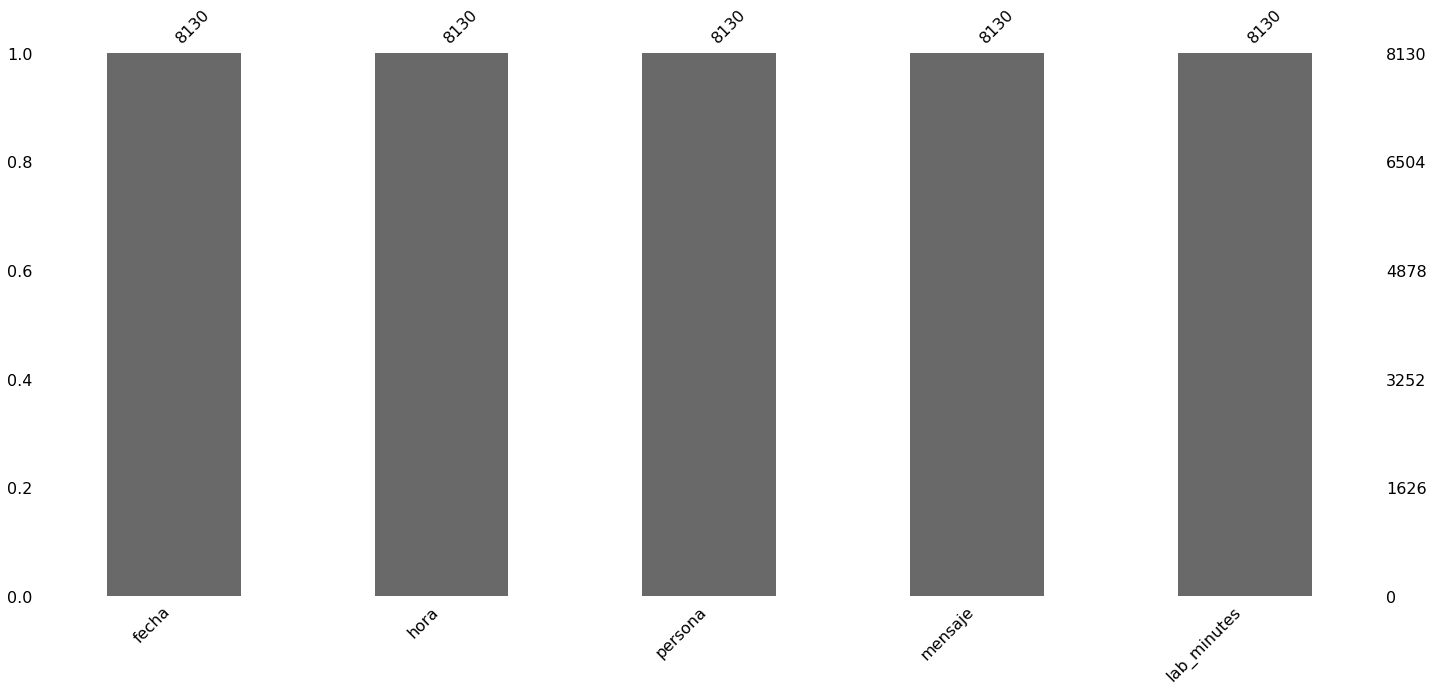

In [17]:
msno.bar(df_copy)

Revisamos la existencia de valores nulos

In [18]:
df_copy.isnull().any().any()

False

_____
**Al no haber valores nulos, entonces las siguientes líneas carecen un poco de sentido, sin embargo se correrán para verificar que en efecto no hay valores nulos.**
_____

Reemplazamos los valores ```&``` y ```' '``` por ```nan```

In [19]:
df_copy.replace(to_replace='&', value=np.nan, inplace=True)

In [20]:
df_copy.replace(to_replace=' ', value=np.nan, inplace=True)

Revisamos (de nuevo) la existencia de valores nulos

In [21]:
df_copy.isnull().any().any()

True

Graficamos los datos con valores nulos reales

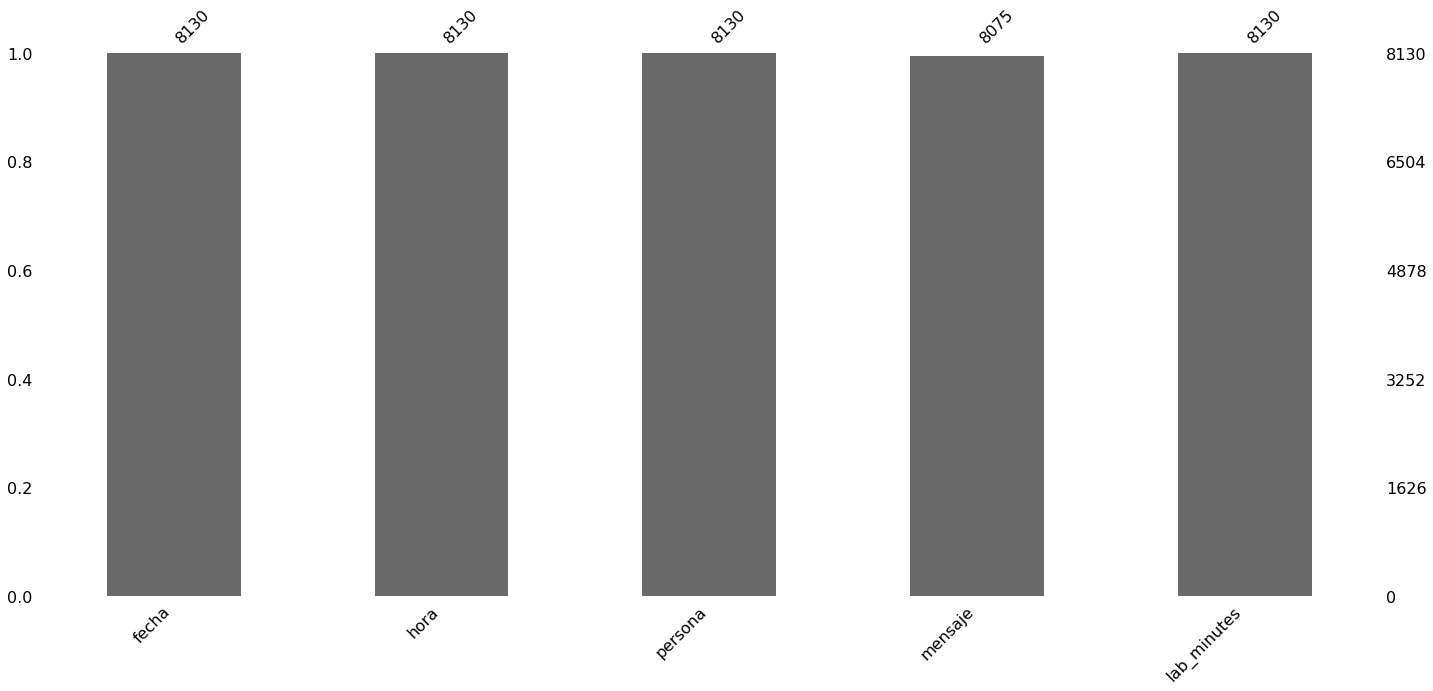

In [22]:
msno.bar(df_copy)

## Limpieza

In [23]:
df_copy.fillna(value=-1, inplace=True)

In [24]:
threshold = round(df_copy.shape[0]*.75)
threshold

6098

In [25]:
l = []
for column in df_copy.columns:
    na_column =  df_copy[column].value_counts().get(-1)
    if(na_column != None):
        print(column, ': ', df_copy.shape[0] - na_column, ' - ', threshold)
        if (df_copy.shape[0] - na_column < threshold):
            print(column, ': ', 'd e l e t e d')
            l.append(column)

fecha :  8129  -  6098
hora :  8129  -  6098
persona :  8100  -  6098
mensaje :  8075  -  6098


In [26]:
l

[]

In [27]:
df_copy.drop(labels=l, axis=1, inplace=True)

In [28]:
df_copy.replace(to_replace=-1, value=np.NaN, inplace=True)

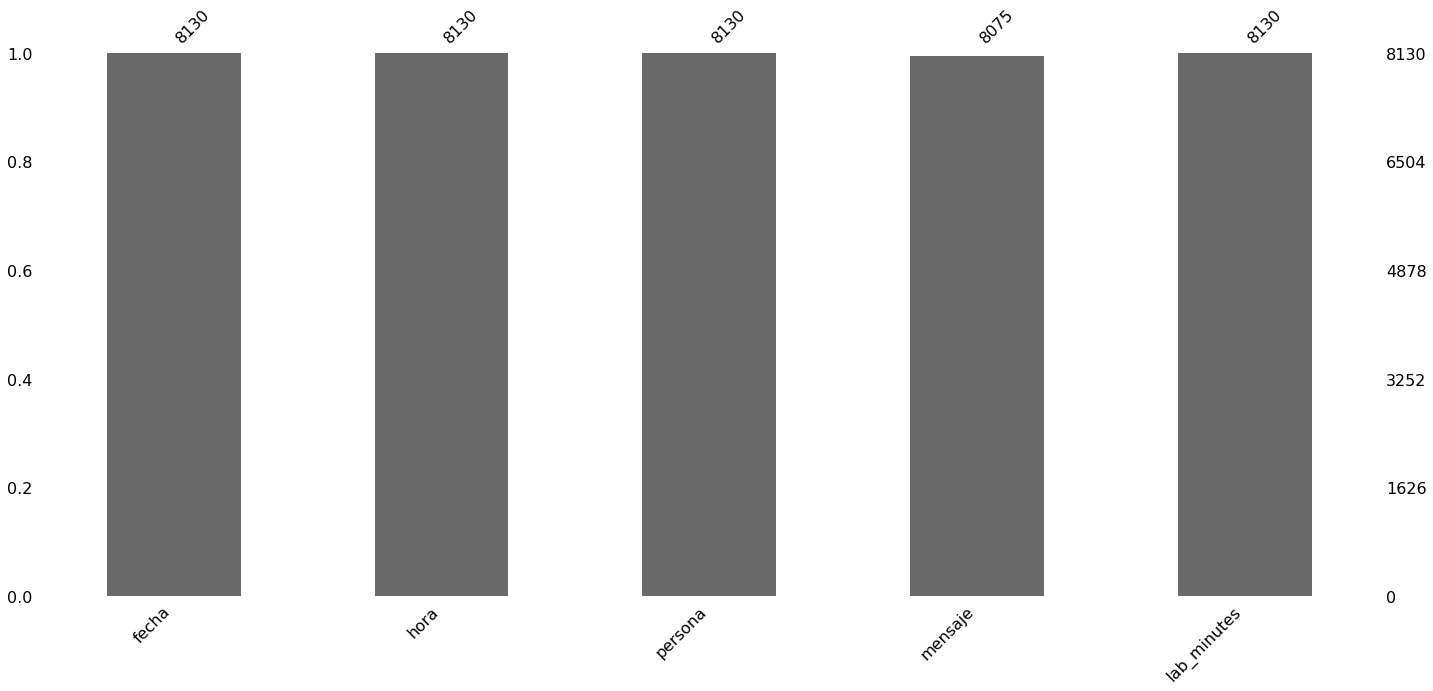

In [29]:
msno.bar(df_copy)

Guardamos el dataframe 